# Vertical Line Test

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

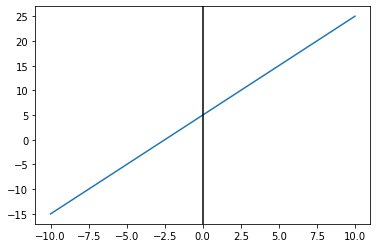

In [17]:
x= np.arange(-10,11)
y = 2*x + 5
plt.plot(x,y);
plt.axvline(x=0, color='black');

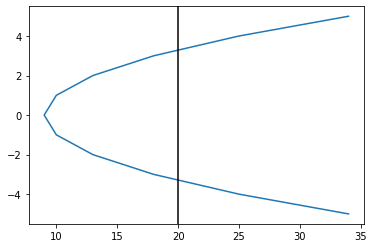

In [18]:
y = np.arange(-5,6)
x=y**2+9
plt.plot(x,y);
plt.axvline(x=20, color='black');

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

A value on the x line could provide more than one answer and a function gives only one y value per x value passed.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 2 because it has one value per x value

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

The first one is a three-dimentional function that outputs a three-dimentional range.
The second one is a quad-dimentional function that outputs a two dimentional range.

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

No because it wouldn't be a function at that point because an input would have two outputs.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [0]:
def p(vect):
  x1=vect[0][0]
  x2=vect[1][0]
  output_row1 = np.array([x1+3*x2])
  output_row2 = np.array([2*x2-x1])
  output_vector= np.array([output_row1,output_row2])
  return output_vector

In [0]:
def q(vect):
  x1=vect[0][0]
  x2=vect[1][0]
  x3=vect[2][0]
  output_row1 = np.array([4*x1+x2+2*x3])
  output_row2 = np.array([2*x2-x1+3*x3])
  output_row3= np.array([5*x1-2*x3+x2])
  output_vector= np.array([output_row1,output_row2,output_row3])
  return output_vector

In [21]:
i_hat = np.array([[1],[0]])
a=p(i_hat)

j_hat=np.array([[0],[1]])
b=p(j_hat)

T= np.column_stack([a,b])
print(T,'\n')

input_vector = np.array([[1],[0]])
print(p(input_vector),'\n')
output_vector = np.matmul(T,input_vector)
print(output_vector)

[[ 1  3]
 [-1  2]] 

[[ 1]
 [-1]] 

[[ 1]
 [-1]]


In [22]:
i_hat = np.array([[1],[0],[0]])
a=q(i_hat)
j_hat=np.array([[0],[1],[0]])
b=q(j_hat)
h_hat=np.array([[0],[0],[1]])
c=q(h_hat)

T= np.column_stack([a,b,c])
print(T,'\n')

input_vector = np.array([[1],[0],[0]])
print(q(input_vector),'\n')
output_vector = np.matmul(T,input_vector)
print(output_vector)

[[ 4  1  2]
 [-1  2  3]
 [ 5  1 -2]] 

[[ 4]
 [-1]
 [ 5]] 

[[ 4]
 [-1]
 [ 5]]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvectors are vectors that don't change direction due to transfomations where eigenvalues are the how the vectors are scaled and the two values always come as a pair.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

We run the risk of overfitting the graphs to test values because there isn't enough data to balance out the number of features.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

5 observations to 1 feature

# Principal Component Analysis

## 7.1 Code for loading and cleaning the 2013 national dataset from the [Housing Affordability Data System (HADS)](https://www.huduser.gov/portal/datasets/hads/hads.html) --housing data, can be found below. 

## Perform PCA on the processed dataset `national_processed` (Make sure you standardize your data!) and then make a scatterplot of PC1 against PC2. Some of our discussion and work around PCA with this dataset will continue during tomorrow's lecture and assignment.

Not only does this dataset have decent amount columns to begin with (99), but in preparing the data for PCA we have also [one-hot-encoded](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f#targetText=One%20hot%20encoding%20is%20a,the%20entry%20in%20the%20dataset.) all of the categorical variables. This has the effect of creating a new column for each individual category of each categorical variable. After processing this dataset has 64738 columns. --Das a lot of columns.

Don't worry too much about the mechanics of one-hot encoding right now, you will learn and experiment with a whole bunch of categorical encoding approaches in unit 2. 

The code below will read in the dataset and perform the one-hot encoding of the categorical variables. Start adding your PCA code at the bottom of the provided code.

In [23]:
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Natinal Data 
national_url = 'https://www.huduser.gov/portal/datasets/hads/hads2013n_ASCII.zip'
national_file = 'thads2013n.txt'

if os.path.exists(national_file):
    national = pd.read_csv(national_file)
else: 
    z_national = urlopen(national_url)
    zip_national = ZipFile(BytesIO(z_national.read())).extract(national_file)
    national = pd.read_csv(zip_national)

print(national.shape)
national.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,2,2006,'1',1,40000,-6,'1',1,6,3117.394239,1,18021,'1',533,1,'1',169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,'1 Adequate','-5','2000-2009','1 Single Family','2 2BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,4,1980,'1',1,130000,-6,'1',1,6,2150.725544,4,122961,'1',487,1,'1',245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','3 150-200% Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,4,1985,'1',1,150000,-6,'1',1,7,2213.789404,2,27974,'1',1405,1,'1',159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'
3,'100006520140',67,'5','3',55846,949,13750,22897,36614,13964,3,1985,'1',1,200000,-6,'1',1,6,2364.585097,2,32220,'1',279,1,'1',179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,'1 Adequate','-5','1980-1989','1 Single Family','3 3BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','6 100 - 120% AMI','7 120% AMI +','7 120% AMI +','5 80 - 100% AMI','4 60 - 80% AMI','.','1 Less than 30%','-5','-5'
4,'100007130148',26,'1','3',60991,737,14801,24628,39421,15492,2,1980,'1',1,-6,-6,'2',100,4,2314.524902,2,96874,'1',759,5,'2',146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.98

In [24]:
# Look at datatypes
# a lot of object datatypes even though they seem to be strings of numbers.
national.dtypes

CONTROL            object
AGE1                int64
METRO3             object
REGION             object
LMED                int64
                    ...  
FMTINCRELAMICAT    object
FMTASSISTED        object
FMTBURDEN          object
FMTREGION          object
FMTSTATUS          object
Length: 99, dtype: object

In [25]:
# check for null values
national.isnull().sum().any()

False

In [26]:
# check for number of categorical vs numeric columns
cat_cols = national.columns[national.dtypes=='object']
num_cols = national.columns[national.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

32 categorical columns
67 numerical columns


In [27]:
# We're making a copy of our data in case we mess something up.
national_processed = national.copy()

# Categorically Encode our Variables:
# They need to all be numeric before we do PCA.
# https://pbpython.com/categorical-encoding.html

# Cast categorical columns to "category" data type
national_processed[cat_cols] = national_processed[cat_cols].astype('category')

national_processed.dtypes

CONTROL            category
AGE1                  int64
METRO3             category
REGION             category
LMED                  int64
                     ...   
FMTINCRELAMICAT    category
FMTASSISTED        category
FMTBURDEN          category
FMTREGION          category
FMTSTATUS          category
Length: 99, dtype: object

In [28]:
# Replace all category cell values with their numeric category codes
for col in cat_cols:
  national_processed[col] = national_processed[col].cat.codes

print(national_processed.shape)
national_processed.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,0,82,2,0,73738,956,15738,26213,40322,11067,2,2006,0,1,40000,-6,1,1,6,3117.394239,1,18021,1,533,1,0,169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,1,0,5,1,2,0,4,4,4,4,3,1,1,1,1,1,1,1,1,1,2,0,2,0,0
1,1,50,4,2,55846,1100,17165,28604,45744,24218,4,1980,0,1,130000,-6,1,1,6,2150.725544,4,122961,1,487,1,0,245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,1,0,3,1,4,0,3,4,4,3,4,2,2,2,1,3,3,3,5,3,7,0,1,0,0
2,2,53,4,2,55846,1100,13750,22897,36614,15470,4,1985,0,1,150000,-6,1,1,7,2213.789404,2,27974,1,1405,1,0,159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,1,0,3,1,4,0,4,4,4,4,3,2,2,2,1,2,3,4,5,3,4,0,3,0,0
3,3,67,4,2,55846,949,13750,22897,36614,13964,3,1985,0,1,200000,-6,1,1,6,2364.585097,2,32220,1,279,1,0,179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,1,0,3,1,3,0,4,4,4,4,4,2,2,2,2,2,5,6,6,4,4,0,1,0,0
4,4,26,0,2,60991,737,14801,24628,39421,15492,2,1980,0,1,-6,-6,2,100,4,2314.524902,2,96874,1,759,5,1,146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,1,1,3,5,2,1,3,3,3,3,4,2,2,2,2,3,2,2,2,2,7,1,1,0,0


In [68]:
national_processed['TYPE'].value_counts()

1    61894
2     2061
3      382
9      141
6       24
5       16
7       10
4        7
Name: TYPE, dtype: int64

In [29]:
# Now we only ahve numeric columns (ints and floats)
national_processed.dtypes

CONTROL            int32
AGE1               int64
METRO3              int8
REGION              int8
LMED               int64
                   ...  
FMTINCRELAMICAT     int8
FMTASSISTED         int8
FMTBURDEN           int8
FMTREGION           int8
FMTSTATUS           int8
Length: 99, dtype: object

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [34]:
feature_cols = national_processed.columns[1:]
feature_cols

Index(['AGE1', 'METRO3', 'REGION', 'LMED', 'FMR', 'L30', 'L50', 'L80', 'IPOV',
       'BEDRMS', 'BUILT', 'STATUS', 'TYPE', 'VALUE', 'VACANCY', 'TENURE',
       'NUNITS', 'ROOMS', 'WEIGHT', 'PER', 'ZINC2', 'ZADEQ', 'ZSMHC',
       'STRUCTURETYPE', 'OWNRENT', 'UTILITY', 'OTHERCOST', 'COST06', 'COST12',
       'COST08', 'COSTMED', 'TOTSAL', 'ASSISTED', 'GLMED', 'GL30', 'GL50',
       'GL80', 'APLMED', 'ABL30', 'ABL50', 'ABL80', 'ABLMED', 'BURDEN',
       'INCRELAMIPCT', 'INCRELAMICAT', 'INCRELPOVPCT', 'INCRELPOVCAT',
       'INCRELFMRPCT', 'INCRELFMRCAT', 'COST06RELAMIPCT', 'COST06RELAMICAT',
       'COST06RELPOVPCT', 'COST06RELPOVCAT', 'COST06RELFMRPCT',
       'COST06RELFMRCAT', 'COST08RELAMIPCT', 'COST08RELAMICAT',
       'COST08RELPOVPCT', 'COST08RELPOVCAT', 'COST08RELFMRPCT',
       'COST08RELFMRCAT', 'COST12RELAMIPCT', 'COST12RELAMICAT',
       'COST12RELPOVPCT', 'COST12RELPOVCAT', 'COST12RELFMRPCT',
       'COST12RELFMRCAT', 'COSTMedRELAMIPCT', 'COSTMedRELAMICAT',
       'COSTMedRE

In [0]:
x = national_processed.loc[:,feature_cols].values
x = StandardScaler().fit_transform(x)

In [36]:
print('{:.2f}'.format(np.mean(x)))
np.std(x)

0.00


0.9948848769417227

In [37]:
normal_national = pd.DataFrame(x, columns=feature_cols)
normal_national.sample(5)

,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,ABL50,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
30806,-0.392184,-0.178959,-1.327872,0.896466,-0.115182,0.830316,0.828811,1.018974,0.371672,-0.603700,0.515773,-0.271749,-0.142292,-0.570378,-0.268140,1.097899,-0.235435,-0.331426,-1.233386,0.434080,-0.663518,-0.001189,-0.217470,0.053755,1.164576,0.882705,-0.466394,-0.405293,-0.472122,-0.433811,-0.378187,-0.507834,1.226057,0.896466,0.830316,0.828811,1.018974,0.872319,0.105457,0.104732,...,0.144074,-0.485548,-0.588115,-0.531009,-1.139197,-0.461542,0.129067,-0.536333,-0.685212,-0.440651,-0.896546,-0.381158,0.167739,-0.409325,-0.452728,-0.001189,-0.706647,0.467274,0.053610,-0.612264,1.164576,-0.080937,-0.110391,-0.147898,-0.052382,-1.342644,-0.518776,-0.588115,-0.685212,-0.452728,-1.091609,-0.956874,-1.028145,-1.139197,-0.896546,-1.169320,0.773833,1.643655,-0.462107,0.0
13931,-2.491077,1.396527,0.576698,-1.405434,-0.653095,-1.490506,-1.490630,-1.566798,-2.215163,0.310570,0.325692,3.679872,-0.142292,-0.570378,3.197696,-2.134368,-0.198902,-0.331426,-0.808955,-3.072895,-0.824704,-2.398410,-1.086888,0.053755,1.164576,-0.684494,-0.466394,-0.407686,-0.473663,-0.435854,-0.380894,-0.693140,-0.774303,-1.405434,-1.490506,-1.490630,-1.566798,-2.653790,-0.928118,-0.929316,...,-3.505595,-0.349997,-0.588115,-0.404389,-0.228305,-0.755448,-3.513093,-0.433635,-0.685212,-0.222010,0.115986,-0.889126,-3.494520,-0.232792,-0.452728,-2.398410,-0.706647,-0.163371,0.053610,0.388888,1.164576,-2.353578,-2.391078,-2.438784,-2.320150,-2.049643,-0.518776,-0.588115,-0.685212,-0.452728,-2.100459,0.024966,-0.077478,-0.228305,0.115986,-1.559520,-0.709278,-1.638890,-0.462107,0.0
45438,-0.348457,0.608784,-1.327872,0.454953,0.100490,1.066496,1.066966,1.067656,1.044698,0.310570,-0.244552,-0.271749,-0.142292,1.236688,-0.268140,-0.518234,-0.253701,0.193641,0.713504,0.823743,0.184547,-0.001189,0.714049,-0.626460,-0.858681,2.052982,0.306657,1.213013,1.238847,1.226078,1.198136,0.464291,-0.774303,0.454953,1.066496,1.066966,1.067656,0.993897,0.514429,0.515456,...,0.448213,1.590299,0.796007,1.231271,1.138032,0.644896,0.432580,1.626128,0.716067,1.133415,1.634783,0.573837,0.472927,1.513424,0.923669,-0.001189,-0.706647,-0.163371,-0.627170,0.388888,-0.858681,0.676610,0.649838,0.615731,0.703541,0.778350,0.859820,0.796007,0.716067,0.923669,0.926091,1.497727,1.348523,1.138032,1.634783,0.781683,-0.709278,-0.544709,-0.462107,0.0
8600,-0.873180,-0.966702,-1.327872,1.731155,-0.292795,0.290863,0.286078,-0.081534,-0.544580,-1.517969,0.515773,-0.271749,-0.142292,-0.570378,-0.268140,1.097899,2.139177,-1.381561,-1.349572,-0.345248,-0.768175,4.793253,-0.860880,2.094401,1.164576,-1.406634,-0.466394,-0.783325,-0.715489,-0.756687,-0.805865,-0.693001,1.448319,1.731155,0.290863,0.286078,-0.081534,0.446361,-0.112702,-0.117060,...,-0.464204,-0.918685,-1.972237,-0.798892,-1.594643,-0.631105,-0.477960,-0.864494,-2.086492,-0.903218,-1.402812,-0.674221,-0.442638,-0.973416,-1.829124,4.793253,1.415134,0.467274,2.095949,-1.613416,1.164576,-1.596031,-1.630849,-1.675155,-1.564228,-1.342644,-1.897372,-1.972237,-2.086492,-1.829124,-1.091609,-1.447794,-1.503478,-1.594643,-1.402812,-1.169320,2.256944,1.643655,-0.462107,0.0
11658,-0.0

In [38]:
covariance_matrix= np.cov(normal_national.T)
covariance_matrix[:1]

array([[ 1.0000155 ,  0.07690262, -0.03859443,  0.0231727 ,  0.0687571 ,
        -0.01681955, -0.01670467, -0.02473836,  0.19553084,  0.07026009,
        -0.00658997, -0.6769571 , -0.0067442 ,  0.14333578, -0.66796811,
         0.25044328,  0.01246942,  0.12650309,  0.02064605,  0.4352433 ,
         0.09160721,  0.42088114,  0.11591535, -0.06005873, -0.28261499,
         0.13806317,  0.11208193,  0.07638497,  0.10225045,  0.08726681,
         0.06622883, -0.04728604, -0.0308573 ,  0.0231727 , -0.01681955,
        -0.01670467, -0.02473836,  0.38130209,  0.06793059,  0.06800148,
         0.0681522 ,  0.06139312,  0.02073715,  0.12990047,  0.50601827,
         0.15003813,  0.62380913,  0.1059814 ,  0.61844491,  0.06336382,
         0.05987613,  0.28060875,  0.66425151,  0.06189304,  0.01053628,
         0.0782453 ,  0.08196131,  0.2772674 ,  0.66499738,  0.07864736,
         0.0241609 ,  0.09887278,  0.11231718,  0.27114011,  0.66608875,
         0.10184161,  0.0437277 ,  0.04964045,  0.0

In [0]:
pca=PCA(n_components=2)

In [0]:
pca_data = pca.fit_transform(x)

In [61]:
print(national_processed.shape)
print(pca_data.shape)

(64535, 99)
(64535, 2)


In [62]:
df = pd.DataFrame(pca_data, columns=['comp_1', 'comp_2'])
df.head(2)

,comp_1,comp_2
0,-2.607484,-1.380332
1,2.010313,-0.992019


In [63]:
pca.explained_variance_ratio_

array([0.34391213, 0.14590979])

In [64]:
sum(pca.explained_variance_ratio_)

0.48982192040999634

In [65]:
df['CONTROL']= national_processed['CONTROL']
df.sample(5)

,comp_1,comp_2,CONTROL
42338,0.449721,-1.466936,42338
52709,0.118895,-0.354812,52709
6549,-2.617993,-2.343474,6549
8229,1.795413,18.884973,8229
28462,-7.619547,-0.440709,28462


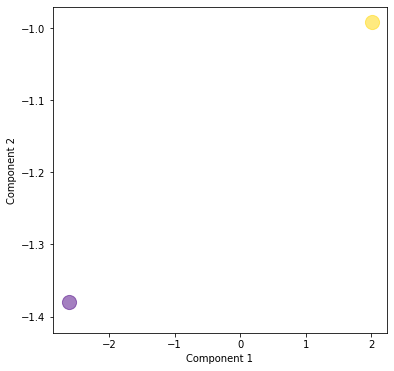

In [67]:
plt.figure(figsize=(6,6))
plt.xlabel('Component 1')
plt.ylabel('Component 2')


for k,c in [(0,'indigo'), (1,'gold')]:
  subset=df[df['CONTROL']==k]
  plt.scatter(x=subset['comp_1'],
              y=subset['comp_2'],
              s=200,
              alpha=.5,
              color=c,
              label=k)
  plt.legend;

# Stretch Goals

## 1) Perform further data exploration on the HADS national dataset (the version before we one-hot encoded it) Make scatterplots and see if you can see any resemblance between the original scatterplots and the plot of the principal components that you made in 7.1. 

(You may or may not not see very much resemblance depending on the variables you choose, and that's ok!)

## 2) Study "Scree Plots" and then try and make one for your PCA dataset. How many principal conponents do you need to retain in order for your PCs to contain 90% of the explained variance? 

We will present this topic formally at the beginning of tomorrow's lecture, so if you figure this stretch goal out, you're ahead of the game. 

## 3) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

Prioritize self-study over this stretch goal if you are not semi-comfortable with the topics of PCA, Eigenvalues, and Eigenvectors.

![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)